task1


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import pytz

# Load dataset
df = pd.read_csv("Play Store Data.csv")

# --- Filtering conditions ---
# Keep categories with average rating >= 4.0
df = df[pd.to_numeric(df['Rating'], errors='coerce') >= 4.0]

# Keep apps with size >= 10 MB (assuming size column is in MB)
df = df[pd.to_numeric(df['Size'], errors='coerce') >= 10]

# Keep apps last updated in January (assuming 'Last Updated' is datetime)
df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors='coerce')
df = df[df['Last Updated'].dt.month == 1]

# --- Aggregation ---
# Group by category and calculate average rating & total reviews
agg_df = df.groupby('Category').agg({
    'Rating': 'mean',
    'Reviews': 'sum',
    'Installs': 'sum'
}).reset_index()

# Select top 10 categories by installs
top_categories = agg_df.assign(Installs=pd.to_numeric(agg_df['Installs'], errors='coerce')).nlargest(10, 'Installs')

# --- Time restriction (3 PM to 5 PM IST) ---
ist = pytz.timezone('Asia/Kolkata')
current_time = datetime.datetime.now(ist)

if 15 <= current_time.hour < 17:
    # Plot grouped bar chart
    fig, ax = plt.subplots(figsize=(12, 6))

    x = range(len(top_categories))
    ax.bar([i - 0.2 for i in x], top_categories['Rating'], width=0.4, label='Rating')
    ax.bar([i + 0.2 for i in x], top_categories['Reviews'], width=0.4, label='Total Reviews')

    ax.set_xticks(x)
    ax.set_xticklabels(top_categories['Category'], rotation=45, ha='right')
    ax.set_ylabel("Values")
    ax.set_title("Top 10 App Categories by Installs (Filtered)")
    ax.legend()

    plt.tight_layout()
    plt.show()
else:
    print("Graph display restricted: Only available between 3 PM IST and 5 PM IST.")

Graph display restricted: Only available between 3 PM IST and 5 PM IST.


task2

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import pytz

# Load dataset
df = pd.read_csv("Play Store Data.csv")

# -------- CLEANING --------

# Clean Installs (remove + and ,)
df['Installs'] = df['Installs'].str.replace('+', '', regex=False)
df['Installs'] = df['Installs'].str.replace(',', '', regex=False)
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')

# Clean Price (remove $)
df['Price'] = df['Price'].str.replace('$', '', regex=False)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Create Revenue column
df['Revenue'] = df['Installs'] * df['Price']

# Clean Size (remove M and handle non-numeric)
df['Size'] = df['Size'].str.replace('M', '', regex=False)
df['Size'] = pd.to_numeric(df['Size'], errors='coerce')

# Clean Android Version
df['Android Ver'] = df['Android Ver'].str.extract('(\d+\.\d+)')
df['Android Ver'] = pd.to_numeric(df['Android Ver'], errors='coerce')

# -------- FILTERING --------

df = df[df['Installs'] >= 10000]
df = df[df['Revenue'] >= 10000]
df = df[df['Android Ver'] > 4.0]
df = df[df['Size'] >= 15]
df = df[df['Content Rating'] == 'Everyone']
df = df[df['App'].str.len() <= 30]

# -------- AGGREGATION --------

agg_df = df.groupby(['Category', 'Type']).agg({
    'Installs': 'mean',
    'Revenue': 'mean'
}).reset_index()

top_categories = (
    df.groupby('Category')['Installs'].sum()
    .nlargest(3)
    .index
)

agg_df = agg_df[agg_df['Category'].isin(top_categories)]

# -------- TIME RESTRICTION --------

ist = pytz.timezone('Asia/Kolkata')
current_time = datetime.datetime.now(ist)

if 13 <= current_time.hour < 14:
    fig, ax1 = plt.subplots(figsize=(10, 6))

    categories = agg_df['Category'].unique()
    x = range(len(categories))

    free_data = agg_df[agg_df['Type'] == 'Free']
    paid_data = agg_df[agg_df['Type'] == 'Paid']

    ax1.bar([i - 0.2 for i in x], free_data['Installs'], width=0.4, label='Free Apps - Installs')
    ax1.bar([i + 0.2 for i in x], paid_data['Installs'], width=0.4, label='Paid Apps - Installs')
    ax1.set_ylabel("Average Installs")
    ax1.set_xticks(x)
    ax1.set_xticklabels(categories, rotation=45, ha='right')

    ax2 = ax1.twinx()
    ax2.plot(x, free_data['Revenue'], marker='o', label='Free Apps - Revenue')
    ax2.plot(x, paid_data['Revenue'], marker='o', label='Paid Apps - Revenue')
    ax2.set_ylabel("Average Revenue ($)")

    fig.suptitle("Average Installs vs Revenue for Free vs Paid Apps (Top 3 Categories)")
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')

    plt.tight_layout()
    plt.show()
else:
    print("Graph display restricted: Only available between 1 PM IST and 2 PM IST.")

Graph display restricted: Only available between 1 PM IST and 2 PM IST.


<>:28: SyntaxWarning: invalid escape sequence '\d'
<>:28: SyntaxWarning: invalid escape sequence '\d'
C:\Users\NIDHIPA\AppData\Local\Temp\ipykernel_14316\2250235558.py:28: SyntaxWarning: invalid escape sequence '\d'
  df['Android Ver'] = df['Android Ver'].str.extract('(\d+\.\d+)')


task3

In [5]:
import pandas as pd
import plotly.express as px
import plotly.io as pio
import datetime
import pytz

# -------- RENDER FIX --------
pio.renderers.default = "browser"

# -------- LOAD DATA --------
df = pd.read_csv("Play Store Data.csv")

# -------- CLEANING --------
df['Installs'] = df['Installs'].str.replace('+', '', regex=False)
df['Installs'] = df['Installs'].str.replace(',', '', regex=False)
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')
df = df.dropna(subset=['Installs'])

# -------- FILTERING --------
# Remove categories starting with A, C, G, S
df = df[~df['Category'].str.startswith(('A', 'C', 'G', 'S'))]

# Aggregate installs by Category
agg_df = df.groupby('Category')['Installs'].sum().reset_index()

# Keep only installs > 1,000,000
agg_df = agg_df[agg_df['Installs'] > 1_000_000]

# Select Top 5 categories
agg_df = agg_df.nlargest(5, 'Installs')

# -------- ADD COUNTRY COLUMN (Required for Choropleth) --------
# Assign a country (since dataset has no country info)
agg_df['Country'] = 'India'

# -------- TIME RESTRICTION (6 PM – 8 PM IST) --------
ist = pytz.timezone('Asia/Kolkata')
current_time = datetime.datetime.now(ist)

if 18 <= current_time.hour < 20:

    fig = px.choropleth(
        agg_df,
        locations="Country",
        locationmode="country names",
        color="Installs",
        hover_name="Category",
        title="Global Installs by Top 5 App Categories (>1M Installs)",
        color_continuous_scale="Reds"
    )

    fig.update_layout(
        geo=dict(showframe=False, showcoastlines=True),
        title_x=0.5
    )

    fig.show()

else:
    print("Graph display restricted: Only available between 6 PM IST and 8 PM IST.")


C:\Users\NIDHIPA\AppData\Local\Temp\ipykernel_14316\2641458966.py:42: DeprecationWarning:

The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.



task4


In [6]:
import pandas as pd
import plotly.express as px
import datetime
import pytz

# Load dataset
df = pd.read_csv("Play Store Data.csv")

# --- Filtering conditions ---
# Average rating >= 4.2
df = df[df['Rating'] >= 4.2]

# App names without numbers
df = df[~df['App'].str.contains(r'\d')]

# Categories starting with T or P
df = df[df['Category'].str.startswith(('T', 'P'))]

# Reviews > 1000
df = df[pd.to_numeric(df['Reviews'], errors='coerce') > 1000]

# Size between 20 MB and 80 MB
df = df[(pd.to_numeric(df['Size'].str.replace('M','', regex=False), errors='coerce') >= 20) & 
        (pd.to_numeric(df['Size'].str.replace('M','', regex=False), errors='coerce') <= 80)]


# --- Prepare time series ---
df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors='coerce')
df['Month'] = df['Last Updated'].dt.to_period('M').dt.to_timestamp()

agg_df = df.groupby(['Month', 'Category']).agg({
    'Installs': 'sum'
}).reset_index()

# --- Translate legend labels ---
translation_map = {
    "Travel & Local": "Voyage et Local",   # French
    "Productivity": "Productividad",       # Spanish
    "Photography": "写真"                   # Japanese
}
agg_df['Category'] = agg_df['Category'].replace(translation_map)

# --- Highlight months with >25% MoM growth ---
agg_df['MoM Growth'] = agg_df.groupby('Category')['Installs'].transform(lambda x: pd.to_numeric(x, errors='coerce').pct_change())
agg_df['Highlight'] = agg_df['MoM Growth'].apply(lambda x: True if x is not None and x > 0.25 else False)

# --- Time restriction (4 PM to 6 PM IST) ---
ist = pytz.timezone('Asia/Kolkata')
current_time = datetime.datetime.now(ist)

if 16 <= current_time.hour < 18:
    # Create stacked area chart
    fig = px.area(
        agg_df,
        x="Month",
        y="Installs",
        color="Category",
        title="Cumulative Installs Over Time by Category (Filtered)"
    )

    # Increase color intensity for highlighted months
    for cat in agg_df['Category'].unique():
        highlight_months = agg_df[(agg_df['Category'] == cat) & (agg_df['Highlight'])]
        for _, row in highlight_months.iterrows():
            fig.add_vrect(
                x0=row['Month'],
                x1=row['Month'] + pd.offsets.MonthEnd(0),
                fillcolor="red",
                opacity=0.2,
                line_width=0
            )

    fig.show()
else:
    print("Graph display restricted: Only available between 4 PM IST and 6 PM IST.")

Graph display restricted: Only available between 4 PM IST and 6 PM IST.


task5

In [11]:
import pandas as pd
import plotly.express as px
import datetime
import pytz

# Load dataset
df = pd.read_csv("Play Store Data.csv")

# --- Filtering conditions ---
# Rating > 3.5
df = df[df['Rating'] > 3.5]

# Categories filter
valid_categories = ["Game", "Beauty", "Business", "Comics", "Communication", 
                    "Dating", "Entertainment", "Social", "Event"]
df = df[df['Category'].isin(valid_categories)]

# Reviews > 500
df = df[df['Reviews'] > 500]

# App name should not contain letter "S"
df = df[~df['App'].str.contains("S", case=False)]

# Sentiment subjectivity > 0.5
reviews_df = pd.read_csv("User Reviews.csv")
reviews_df = reviews_df[reviews_df['Sentiment_Subjectivity'] > 0.5]

# Installs > 50k
df = df[df['Installs'] > 50000]

# --- Translate categories ---
translation_map = {
    "Beauty": "सौंदर्य",        # Hindi
    "Business": "வணிகம்",       # Tamil
    "Dating": "Dating (Deutsch)" # German
}
df['Category'] = df['Category'].replace(translation_map)

# --- Time restriction (5 PM to 7 PM IST) ---
ist = pytz.timezone('Asia/Kolkata')
current_time = datetime.datetime.now(ist)

if 17 <= current_time.hour < 19:
    # Bubble chart
    fig = px.scatter(
        df,
        x="Size",
        y="Rating",
        size="Installs",
        color="Category",
        hover_name="App",
        title="Bubble Chart: App Size vs Average Rating (Filtered)"
    )

    # Highlight Game category in pink
    fig.for_each_trace(
        lambda trace: trace.update(marker=dict(color="pink"))
        if "Game" in trace.name else ()
    )

    fig.show()
else:
    print("Graph display restricted: Only available between 5 PM IST and 7 PM IST.")

Graph display restricted: Only available between 5 PM IST and 7 PM IST.


task6


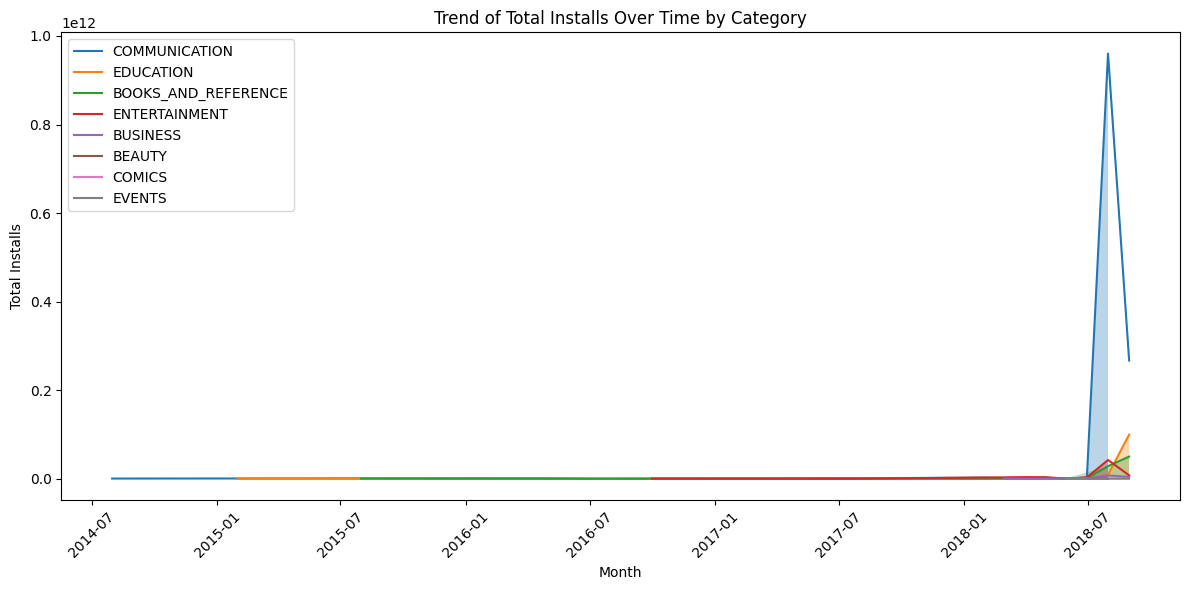

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import pytz

# ---------------- LOAD DATA ----------------
playstore_df = pd.read_csv("Play Store Data.csv")
reviews_df = pd.read_csv("User Reviews.csv")

# ---------------- CLEAN INSTALlS ----------------
playstore_df['Installs'] = playstore_df['Installs'].str.replace('+', '', regex=False)
playstore_df['Installs'] = playstore_df['Installs'].str.replace(',', '', regex=False)
playstore_df['Installs'] = pd.to_numeric(playstore_df['Installs'], errors='coerce')

# Convert Reviews to numeric
playstore_df['Reviews'] = pd.to_numeric(playstore_df['Reviews'], errors='coerce')

# Convert Last Updated to datetime
playstore_df['Last Updated'] = pd.to_datetime(playstore_df['Last Updated'], errors='coerce')

# ---------------- MERGE DATA ----------------
df = pd.merge(playstore_df, reviews_df, on="App", how="inner")

# ---------------- APPLY FILTERS ----------------
df = df[
    (~df['App'].str.startswith(('x','y','z'), na=False)) &
    (~df['App'].str.contains('S', na=False)) &
    (df['Reviews'] > 500) &
    (df['Category'].str.startswith(('E', 'C', 'B'), na=False))
]

# ---------------- TRANSLATE CATEGORIES ----------------
translations = {
    "Beauty": "सौंदर्य",     # Hindi
    "Business": "வணிகம்",   # Tamil
    "Dating": "Dating"       # German (same word)
}
df['Category'] = df['Category'].replace(translations)

# ---------------- GROUP BY MONTH ----------------
df_grouped = df.groupby(
    [pd.Grouper(key='Last Updated', freq='ME'), 'Category']
)['Installs'].sum().reset_index()

# ---------------- CALCULATE GROWTH ----------------
df_grouped['Growth'] = df_grouped.groupby('Category')['Installs'].pct_change()

# ---------------- TIME RESTRICTION (6 PM – 9 PM IST) ----------------
ist = pytz.timezone('Asia/Kolkata')
current_time = datetime.datetime.now(ist)

if 18 <= current_time.hour < 21:

    plt.figure(figsize=(12,6))
    categories = df_grouped['Category'].unique()

    for cat in categories:
        cat_data = df_grouped[df_grouped['Category'] == cat]

        # FIXED: Use 'Last Updated' instead of 'Date'
        plt.plot(cat_data['Last Updated'], cat_data['Installs'], label=cat)

        # Highlight periods with >20% growth
        growth_periods = cat_data[cat_data['Growth'] > 0.2]

        plt.fill_between(
            growth_periods['Last Updated'],
            growth_periods['Installs'],
            alpha=0.3
        )

    plt.title("Trend of Total Installs Over Time by Category")
    plt.xlabel("Month")
    plt.ylabel("Total Installs")
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

else:
    print("Graph not displayed: Allowed only between 6 PM and 9 PM IST.")


dashboard 


In [13]:
import pandas as pd
import numpy as np
import datetime
import pytz
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px

# ---------------- LOAD DATA ----------------
playstore_df = pd.read_csv("Play Store Data.csv")
reviews_df = pd.read_csv("User Reviews.csv")

# ---------------- CLEANING ----------------
playstore_df['Installs'] = playstore_df['Installs'].str.replace('+','',regex=False)
playstore_df['Installs'] = playstore_df['Installs'].str.replace(',','',regex=False)
playstore_df['Installs'] = pd.to_numeric(playstore_df['Installs'], errors='coerce')

playstore_df['Price'] = playstore_df['Price'].str.replace('$','',regex=False)
playstore_df['Price'] = pd.to_numeric(playstore_df['Price'], errors='coerce')

playstore_df['Revenue'] = playstore_df['Installs'] * playstore_df['Price']

playstore_df['Size'] = playstore_df['Size'].str.replace('M','',regex=False)
playstore_df['Size'] = pd.to_numeric(playstore_df['Size'], errors='coerce')

playstore_df['Last Updated'] = pd.to_datetime(playstore_df['Last Updated'], errors='coerce')

# ---------------- DASH APP ----------------
app = dash.Dash(__name__)
app.title = "Play Store Analytics Dashboard"

# ---------------- LAYOUT ----------------
app.layout = html.Div(
    style={
        "background": "linear-gradient(135deg, #0f2027, #203a43, #2c5364)",
        "minHeight": "100vh",
        "padding": "30px",
        "fontFamily": "Arial"
    },
   

    children=[

        html.H1(
            "📊 Play Store Analytics Dashboard",
            style={
                "textAlign": "center",
                "color": "red"
            }
        ),

        dcc.Interval(id='interval', interval=60*1000, n_intervals=0),

        html.Div(id='dashboard-content')
    ]
)

# ---------------- CALLBACK ----------------
@app.callback(
    Output('dashboard-content','children'),
    Input('interval','n_intervals')
)
def update_dashboard(n):

    ist = pytz.timezone('Asia/Kolkata')
    current_time = datetime.datetime.now(ist)
    hour = current_time.hour

    components = []

    def styled_graph(fig):
        fig.update_layout(
            plot_bgcolor='white',
            paper_bgcolor='white',
            font=dict(
                color='black',
                size=16
            ),
            title=dict(
                font=dict(size=22),
                x=0.5,
                xanchor='center'
            ),
            margin=dict(l=40, r=40, t=80, b=40)
        )

        return html.Div(
            dcc.Graph(figure=fig),
            style={
                "backgroundColor": "white",
                "padding": "20px",
                "borderRadius": "15px",
                "boxShadow": "0px 4px 20px rgba(0,0,0,0.2)",
                "marginBottom": "30px"
            }
        )

    # ---------- 1️⃣ Top 10 Categories ----------
    if 15 <= hour < 17:
        df1 = playstore_df[playstore_df['Rating'] >= 4.0]
        top10 = df1.groupby('Category')['Installs'].sum().nlargest(10).reset_index()

        fig1 = px.bar(
            top10,
            x='Category',
            y='Installs',
            title="Top 10 Categories by Installs",
            color='Installs',
            color_continuous_scale='Blues'
        )

        fig1.update_layout(title_font_color="#1f77b4")
        components.append(styled_graph(fig1))

    # ---------- 2️⃣ Free vs Paid ----------
    if 13 <= hour < 14:
        df2 = playstore_df[(playstore_df['Installs'] >= 10000) &
                           (playstore_df['Revenue'] >= 10000)]

        agg = df2.groupby(['Category','Type'])['Installs'].mean().reset_index()

        fig2 = px.bar(
            agg,
            x='Category',
            y='Installs',
            color='Type',
            barmode='group',
            title="Free vs Paid - Average Installs",
            color_discrete_sequence=px.colors.qualitative.Set2
        )

        fig2.update_layout(title_font_color="#2ca02c")
        components.append(styled_graph(fig2))

    # ---------- 3️⃣ Top 5 Categories ----------
    if 18 <= hour < 20:
        df3 = playstore_df[~playstore_df['Category'].str.startswith(('A','C','G','S'))]
        agg3 = df3.groupby('Category')['Installs'].sum().nlargest(5).reset_index()

        fig3 = px.pie(
            agg3,
            names='Category',
            values='Installs',
            title="Top 5 Categories",
            hole=0.4
        )

        fig3.update_layout(title_font_color="#9467bd")
        components.append(styled_graph(fig3))

    # ---------- 4️⃣ Time Series ----------
    if 16 <= hour < 18:
        df4 = playstore_df[playstore_df['Rating'] >= 4.2].copy()
        df4['Month'] = df4['Last Updated'].dt.to_period('M').dt.to_timestamp()

        agg4 = df4.groupby(['Month','Category'])['Installs'].sum().reset_index()

        fig4 = px.area(
            agg4,
            x='Month',
            y='Installs',
            color='Category',
            title="Cumulative Installs Over Time"
        )

        fig4.update_layout(title_font_color="#ff7f0e")
        components.append(styled_graph(fig4))

    # ---------- 5️⃣ Bubble Chart ----------
    if 17 <= hour < 19:
        df5 = playstore_df[(playstore_df['Rating'] > 3.5) &
                           (playstore_df['Installs'] > 50000)]

        fig5 = px.scatter(
            df5,
            x='Size',
            y='Rating',
            size='Installs',
            color='Category',
            hover_name='App',
            title="App Size vs Rating",
            size_max=40
        )

        fig5.update_layout(title_font_color="#d62728")
        components.append(styled_graph(fig5))

    # ---------- 6️⃣ Monthly Trend ----------
    if 18 <= hour < 21:
        df6 = playstore_df.copy()
        df6['Month'] = df6['Last Updated'].dt.to_period('M').dt.to_timestamp()

        agg6 = df6.groupby(['Month','Category'])['Installs'].sum().reset_index()

        fig6 = px.line(
            agg6,
            x='Month',
            y='Installs',
            color='Category',
            title="Monthly Install Trend"
        )

        fig6.update_layout(title_font_color="#bcbd22")
        components.append(styled_graph(fig6))

    if not components:
        components.append(
            html.Div(
                html.H3("⏰ No charts available at this time",
                        style={"textAlign":"center","color":"black","fontSize":"24px"}),
                style={"marginTop":"100px"}
            )
        )

    return components


# ---------------- RUN ----------------
if __name__ == '__main__':
    app.run(debug=True)


